<h1>
segmentation an image using histogram

In [23]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [24]:
img = cv2.imread("cat.4002.jpg", cv2.IMREAD_GRAYSCALE)

(array([0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        1.100e+01, 1.600e+01, 4.500e+01, 9.100e+01, 2.380e+02, 4.150e+02,
        4.420e+02, 5.650e+02, 5.290e+02, 6.450e+02, 7.050e+02, 7.990e+02,
        8.890e+02, 8.830e+02, 9.450e+02, 1.075e+03, 1.075e+03, 1.143e+03,
        1.302e+03, 1.342e+03, 1.325e+03, 1.269e+03, 1.195e+03, 1.128e+03,
        9.840e+02, 1.045e+03, 1.014e+03, 9.720e+02, 9.300e+02, 8.990e+02,
        8.350e+02, 8.250e+02, 8.480e+02, 9.050e+02, 8.810e+02, 9.780e+02,
        9.880e+02, 1.091e+03, 1.044e+03, 1.102e+03, 1.121e+03, 1.159e+03,
        1.119e+03, 1.076e+03, 1.101e+03, 1.086e+03, 1.145e+03, 1.116e+03,
        1.226e+03, 1.348e+03, 1.498e+03, 1.526e+03, 1.629e+03, 1.661e+03,
        1.817e+03, 1.961e+03, 1.935e+03, 2.306e+03, 2.515e+03, 2.599e+03,
        2.690e+03, 2.747e+03, 2.824e+03, 2.660e+03, 2.638e+03, 2.829e+03,
        2.464e+03, 2.376e+03, 2.499e+03, 2.441e+03, 2.454e+03, 2.381e+03,
        2.575e+03, 2.759e+03, 2.790e+0

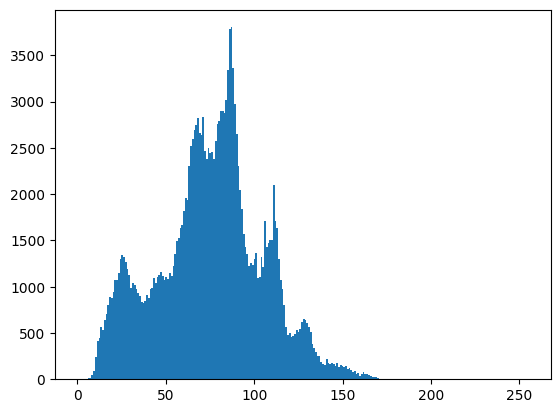

In [25]:
plt.hist(img.flatten(), bins=256, range=(0,255))

(array([1.299e+03, 0.000e+00, 1.360e+03, 0.000e+00, 0.000e+00, 1.095e+03,
        0.000e+00, 1.108e+03, 0.000e+00, 0.000e+00, 1.321e+03, 0.000e+00,
        1.216e+03, 0.000e+00, 0.000e+00, 1.713e+03, 0.000e+00, 1.433e+03,
        0.000e+00, 0.000e+00, 1.468e+03, 0.000e+00, 0.000e+00, 1.501e+03,
        0.000e+00, 1.502e+03, 0.000e+00, 0.000e+00, 2.096e+03, 0.000e+00,
        1.705e+03, 0.000e+00, 0.000e+00, 1.630e+03, 0.000e+00, 1.294e+03,
        0.000e+00, 0.000e+00, 1.077e+03, 0.000e+00, 9.720e+02, 0.000e+00,
        0.000e+00, 7.970e+02, 0.000e+00, 0.000e+00, 5.700e+02, 0.000e+00,
        4.830e+02, 0.000e+00, 0.000e+00, 4.970e+02, 0.000e+00, 4.620e+02,
        0.000e+00, 0.000e+00, 4.690e+02, 0.000e+00, 4.880e+02, 0.000e+00,
        0.000e+00, 5.300e+02, 0.000e+00, 0.000e+00, 5.140e+02, 0.000e+00,
        5.420e+02, 0.000e+00, 0.000e+00, 6.230e+02, 0.000e+00, 6.460e+02,
        0.000e+00, 0.000e+00, 6.350e+02, 0.000e+00, 6.090e+02, 0.000e+00,
        0.000e+00, 5.620e+02, 0.000e+0

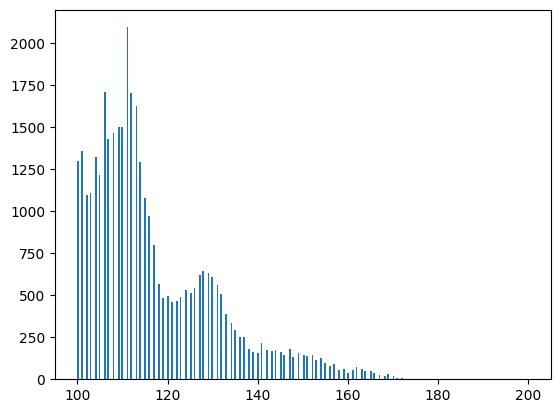

In [26]:
plt.hist(img.flatten(), bins=256, range=(100,200))

In [43]:
seg_1 = (img<38)
seg_2 = ((img>=38) & (img<75))
seg_3 = ((img>=75) & (img<120))
seg_4 = (img>=120)

In [44]:
new_image = np.zeros((img.shape[0], img.shape[1], 3))

In [45]:
new_image[seg_1] = [0,0,255]
new_image[seg_2] = [0,255,0]
new_image[seg_3] = [255,0,0]
new_image[seg_4] = [0,255,255]



In [46]:
cv2.imshow("seg_img", new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
cv2.imwrite("segmentation_using_histogram.png", new_image)

True

In [48]:
from scipy import ndimage as nd 

In [77]:
seg_1_opened = nd.binary_opening(seg_1, np.ones((5,5)))
seg_1_closed = nd.binary_closing(seg_1_opened, np.ones((7,7)))

seg_2_opened = nd.binary_opening(seg_2, np.ones((5,5)))
seg_2_closed = nd.binary_closing(seg_2_opened, np.ones((7,7)))

seg_3_opened = nd.binary_opening(seg_3, np.ones((5,5)))
seg_3_closed = nd.binary_closing(seg_3_opened, np.ones((7,7)))

seg_4_opened = nd.binary_opening(seg_4, np.ones((5,5)))
seg_4_closed = nd.binary_closing(seg_4_opened, np.ones((7,7)))

In [78]:
new_image_cleaned = np.zeros((img.shape[0], img.shape[1], 3))
new_image_cleaned[seg_1_closed] = [0,0,255]
new_image_cleaned[seg_2_closed] = [0,255,0]
new_image_cleaned[seg_3_closed] = [255,0,0]
new_image_cleaned[seg_4_closed] = [0,255,255]

In [79]:
cv2.imshow("segmentation_cleaned_using_histogram", new_image_cleaned)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [76]:
cv2.imwrite("segmentation_cleaned_using_histogram.png", new_image_cleaned)

True